4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/10
938/938 [==============================] - 7s 6ms/step - loss: 0.5523 - accuracy: 0.7931 - val_loss: 0.4013 - val_accuracy: 0.8541
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3498 - accuracy: 0.8718 - val_loss: 0.3439 - val_accuracy: 0.8759
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2995 - accuracy: 0.8897 - val_loss: 0.3129 - val_accuracy: 0.8861
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2717 - accuracy: 0.8999 - val_loss: 0.2963 - val_accuracy: 0.8934
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2457 - accuracy: 0.9095 - val_loss: 0.2804 - val_accuracy: 0.8969
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2262 - accuracy: 0.9159 - val_loss: 0.2683 - val_accuracy: 0.9028
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2058 - ac

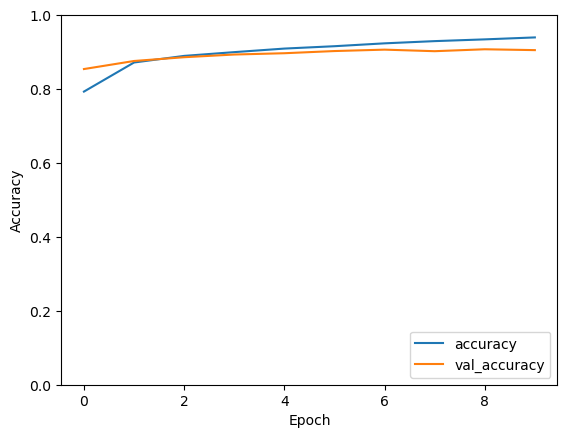

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape the images to include a channel dimension (grayscale)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Design the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Visualize the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
